In [230]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from pprint import pprint
import random

# File to Load (Remember to Change These)
file_to_load = "belize_airbnb_listings.csv"

# Read Purchasing File and store into Pandas data frame
belize_data_df = pd.read_csv(file_to_load)

belize_data_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


1.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 

    a.	How do you choose your bin size?

I'm not sure if this is what you meant, but the question asks for two histograms in one subplot. I also did them in separate subplots underneath.

Bin size is chosen using "bins=np.linspace(start, stop, sample number)," but replace the words in parentheses with numbers for the lower limit for the x-axis of the histogram, the upper limit, and the number of times a sample should be taken.

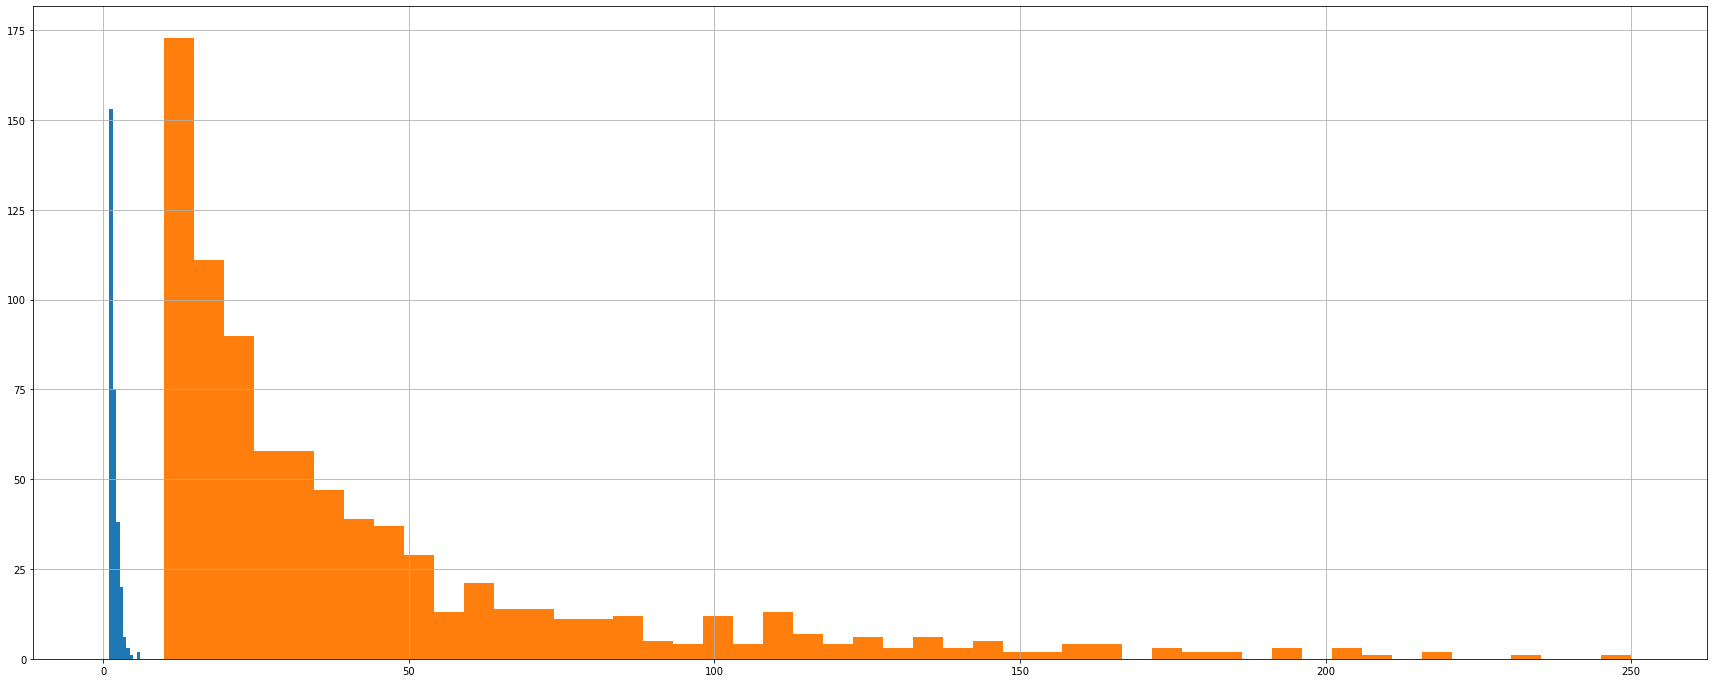

In [54]:
fig, ax = plt.subplots()
belize_data_df["reviews_per_month"].hist(figsize=(30,12), bins=np.linspace(1, 6, 10))
belize_data_df["number_of_reviews"].hist(figsize=(30,12), bins=np.linspace(10, 250, 50))
plt.show()

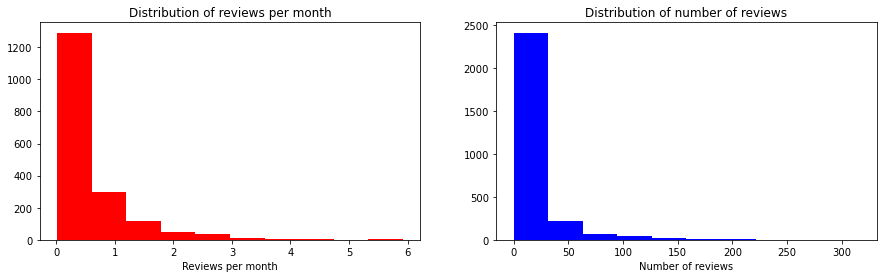

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15,4), sharey = False)
ax[0].hist(belize_data_df["reviews_per_month"], color = "r")
ax[1].hist(belize_data_df["number_of_reviews"], color = "b")
ax[0].set_title("Distribution of reviews per month")
ax[0].set_xlabel("Reviews per month")
ax[1].set_title("Distribution of number of reviews")
ax[1].set_xlabel("Number of reviews")
plt.show()

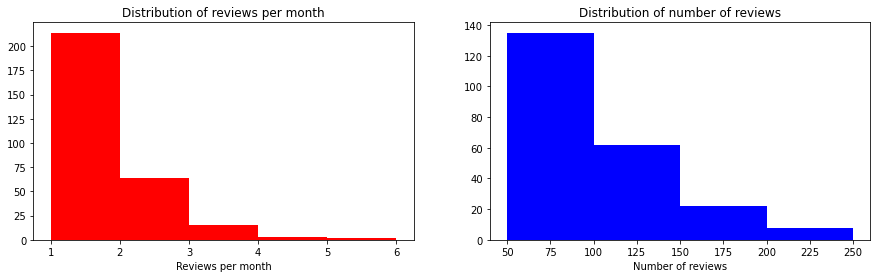

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(15,4), sharey = False)
ax[0].hist(belize_data_df["reviews_per_month"], bins = [1, 2, 3, 4, 5, 6], color = "r")
ax[1].hist(belize_data_df["number_of_reviews"], bins = [50, 100, 150, 200, 250], color = "b")
ax[0].set_title("Distribution of reviews per month")
ax[0].set_xlabel("Reviews per month")
ax[1].set_title("Distribution of number of reviews")
ax[1].set_xlabel("Number of reviews")
plt.show()

2. Create a box and whisker plot for availability_365. What does this show you?

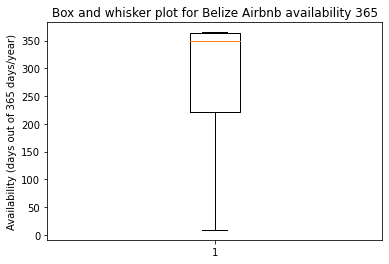

In [57]:
fig, ax = plt.subplots()
ax.boxplot(belize_data_df["availability_365"], showfliers=False)
ax.set_title("Box and whisker plot for Belize Airbnb availability 365")
ax.set_ylabel("Availability (days out of 365 days/year)")
plt.show()

The "box" portion shows the majority of the data by covering the interquartile range. This way, outliers are excluded. The yellow line is the median. The "whiskers" stretch to the maximum and minimum values, thus catching all outliers, as well. In this case, the majority of listings are available at least 200 days a year, and the median is even much higher, around 350 days per year. At least one outlier is close to zero, which would likely skew the mean, so the median is a more usefull average, and the box and whisker plot is helpful for seeing how widely the availabilities vary.

3.	What is the probability that the price for an Airbnb is under $50?

    a.	What do you notice about these records? Hint: look at the other columns.

    b.	What distribution does this data most closely fit?

In [58]:
# Create probability distribution
price_dist = belize_data_df["price"].value_counts() / belize_data_df.shape[0]

# Reset index and rename columns
price_dist = price_dist.reset_index()
price_dist.columns = ["price", "prob"]

# Expected value
price_exp_val = np.sum(price_dist["price"] * price_dist["prob"])

# Subset prices under $50
price_under_50 = price_dist[price_dist["price"] < 50]

# Sum the probabilities of price_under_50
prob_price_under_50 = np.sum(price_under_50["prob"])
print("Probability of price under $50: ", prob_price_under_50)

Probability of price under $50:  0.01752503576537911


In [59]:
belize_data_df.sort_values("price")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
172,4936432,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51426,-88.22121,Shared room,20,1,16,2/4/2020,0.24,10,365
134,4005831,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51482,-88.22233,Private room,20,1,2,3/1/2020,0.03,10,365
315,10004488,Long Term Stay in the country,48785884,Barbara And Bart,Orange Walk,Orange Walk,18.08422,-88.54060,Entire home/apt,22,28,0,NaN,NaN,2,115
2480,43565943,Mama Tina's Medicinal RVs Campsite &Farm,211487445,Moncho,Cayo,Cayo,17.07565,-89.13084,Entire home/apt,24,1,0,NaN,NaN,2,364
912,21693610,Dorm Bed in San Ignacio,145194031,Francisco & Nelli,Cayo,Cayo,17.16216,-89.06854,Shared room,24,2,36,3/5/2020,0.93,5,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,47456898,"Tarpon Sands, All Inclusive, Private Island fo...",74902895,Peter & Sarah,Belize,Belize Islands,17.56691,-88.06989,Private room,6045,3,0,NaN,NaN,1,365
1241,26161749,ENTIRE PRIVATE ISLAND FOR AN EPIC GROUP VACATION,72483617,Gecko Vacation,Stann Creek,Stann Creek Mainland,16.51156,-88.36036,Entire home/apt,6045,6,0,NaN,NaN,9,59
2675,46332977,Solvei: Naia's Ultimate Beach House,375022477,Clive,Stann Creek,Stann Creek Mainland,16.58882,-88.35781,Entire home/apt,8060,1,0,NaN,NaN,1,0
1931,37357127,Incredible All-Inclusive Island KANU!!,72483617,Gecko Vacation,Stann Creek,Stann Creek Mainland,16.51633,-88.37694,Entire home/apt,10266,4,0,NaN,NaN,9,87


a. Listings priced under $50 seem more likely to be shared rooms and less likely to be entire homes or apartments. They also tend not to be in the Stann Creek neighborhood group. 

In [102]:
mean_price = belize_data_df['price'].mean()
mean_price

357.1022889842632

In [101]:
median_price = belize_data_df['price'].median()
median_price

220.0

In [103]:
mode_price = belize_data_df['price'].mode().iloc[0]
mode_price

151

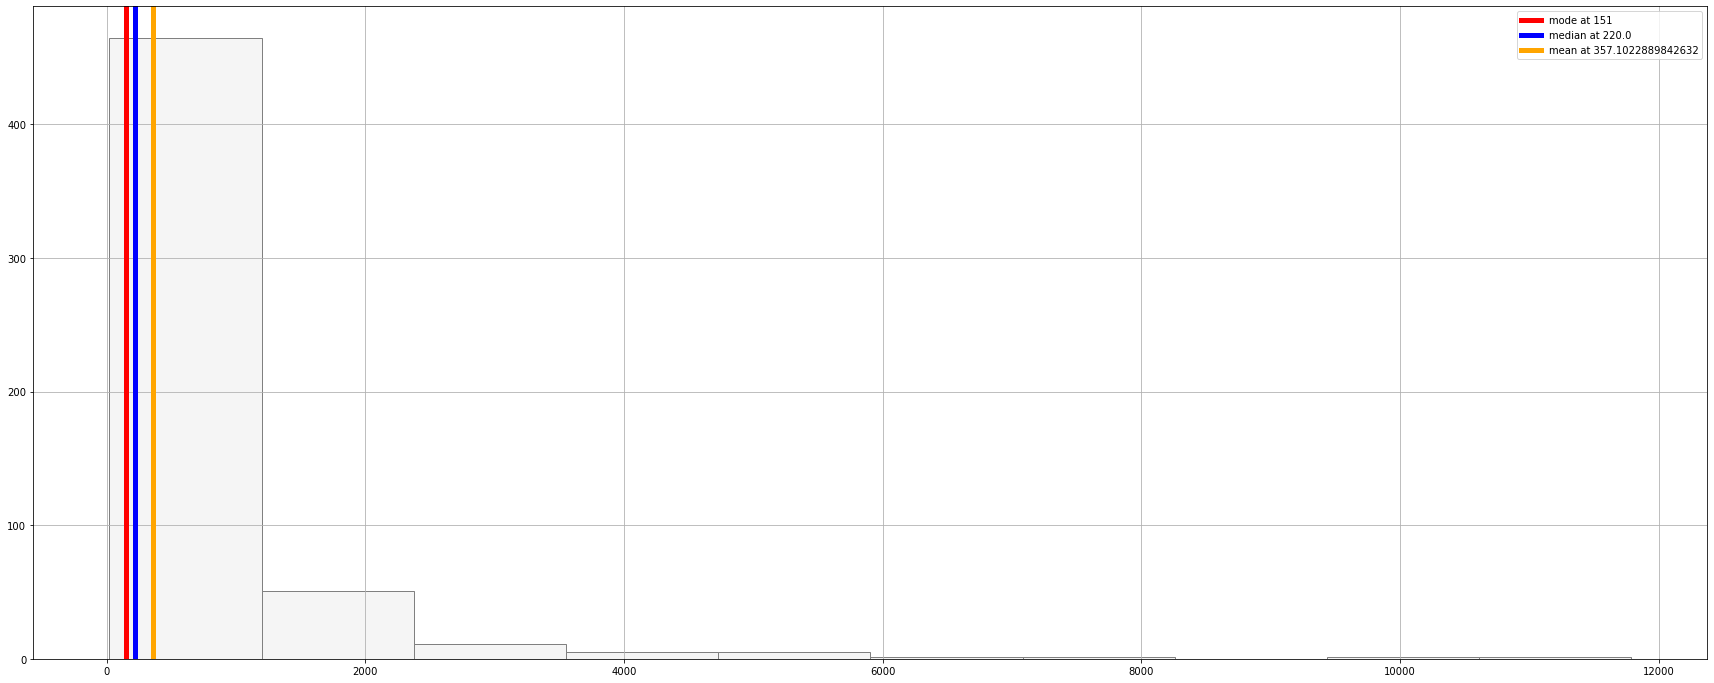

In [117]:
price_dist["price"].hist(figsize=(30,12), bins=None, color='whitesmoke', edgecolor='gray')
measurements = [mode_price, median_price, mean_price]
names = ["mode", "median", "mean"]
colors = ['red', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linewidth=5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

b. This data most closely fits a right-skewed distribution.

4.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 

    a.	Why sample variance and not population variance?

    b.	What is your takeaway for each metric?

    c.	What are the scales of measurement for each of these values? 


In [255]:
belize_data_df.agg([np.var, np.std])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
var,1.661428e+14,1.036327e+16,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


In [261]:
belize_data_svar_std = pd.DataFrame([np.var(belize_data_df, ddof=1), belize_data_df.agg(np.std)])
belize_data_svar_std

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1.661428e+14,1.036327e+16,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157
1,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


In [264]:
belize_data_df.agg(["var","std"])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
var,1.661428e+14,1.036327e+16,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


a. This data set is a sample of AirBnB listings in belize, not a comprehensive list of every AirBnB listing.

b. This question isn't very specific, so I'm not sure what type of takeaway I'm supposed to be thinking about. I did notice that the results were the same whether I set the degrees of freedom as 0 or 1 or left them as default (which I beleive is 0).

c. For everything except id and host_id, the values are on a ratio scale of measurement. I think that id and host_id are nominal values, and the sample variance and standard deviation for those categories aren't really useful.

5.	What percent of Airbnb listings in Belize are available 360 days a year or more?

    a.	360 days or less?

    b.	What distribution does this data most closely fit?


In [281]:
pct_avail_360_plus = belize_data_df.loc[belize_data_df['availability_365'] >= 360, 'availability_365'].count()/belize_data_df['availability_365'].count()
pct_avail_360_plus

0.3952074391988555

Approximately 39.52% of AirBnB listings in Belize are available 360 days a year or more.

In [282]:
pct_avail_360_minus = belize_data_df.loc[belize_data_df['availability_365'] <= 360, 'availability_365'].count()/belize_data_df['availability_365'].count()
pct_avail_360_minus

0.6155221745350501

a. Approximately 61.55% of AirBnB listings in Belize are available 360 days a year or less.

In [284]:
# Create probability distribution
avail_365_dist = belize_data_df["availability_365"].value_counts() / belize_data_df.shape[0]

# Reset index and rename columns
avail_365_dist = avail_365_dist.reset_index()
avail_365_dist.columns = ["availability_365", "prob"]

# Expected value
avail_365_exp_val = np.sum(avail_365_dist["availability_365"] * avail_365_dist["prob"])

# Subset prices under $50
#price_under_50 = price_dist[price_dist["price"] < 50]

# Sum the probabilities of price_under_50
#prob_price_under_50 = np.sum(price_under_50["prob"])
#print("Probability of price under $50: ", prob_price_under_50)

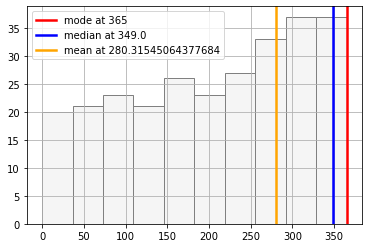

In [287]:
mean_avail_365 = belize_data_df['availability_365'].mean()
median_avail_365 = belize_data_df['availability_365'].median()
mode_avail_365 = belize_data_df['availability_365'].mode().iloc[0]


avail_365_dist["availability_365"].hist(bins=None, color='whitesmoke', edgecolor='gray')
measurements = [mode_avail_365, median_avail_365, mean_avail_365]
names = ["mode", "median", "mean"]
colors = ['red', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

b. This data most closely fits a left-skewed distribution.

6.	What minimum night count are 75% of Airnbnb listings in Belize greater than?

In [124]:
#Calculate 25th percentile:
belize_data_df.availability_365.quantile(0.25)

221.0

In [134]:
#Same calculation, using numpy:
np.quantile(belize_data_df["availability_365"], 0.25)

221.0

75% of the Belize AirBnB listings are available for more that 221 nights per year.